# CSE 802 - Pattern Recognition
# HW 1
By Riya Thakore

# Q1 
Iris flower dataset

**(a) [3 points] Compute and report the mean pattern vector, i.e., the centroid, of each class.**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
df.head(10)
#class are 0,1,2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


Method 1: Use groupby

In [ ]:
df1 = df.groupby(['target'])['sepal length (cm)'].apply(lambda x: np.mean(x.tolist(), axis=0))

In [ ]:
df2 = df.groupby(['target'])['sepal width (cm)'].apply(lambda x: np.mean(x.tolist(), axis=0))

In [ ]:
df3 = df.groupby(['target'])['petal length (cm)'].apply(lambda x: np.mean(x.tolist(), axis=0))

In [ ]:
df4 = df.groupby(['target'])['petal width (cm)'].apply(lambda x: np.mean(x.tolist(), axis=0))

In [ ]:
from functools import reduce
dfs = [df1, df2, df3, df4]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['target'],how='outer'), dfs).fillna('none')
(final_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.428,1.462,0.246
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


Method 2: Separate dataset into dataframes and take mean columnwise

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
iris_X, iris_y = iris.data, iris.target
mean_vectors = [] 
for c in [0, 1, 2]: 
  class_mean_vector = np.mean(iris_X[iris_y==c], axis=0) 
  mean_vectors.append(class_mean_vector) 
  print(c, class_mean_vector)
  

0 [5.006 3.428 1.462 0.246]
1 [5.936 2.77  4.26  1.326]
2 [6.588 2.974 5.552 2.026]


**(b) [3 points] For each class, determine the pattern (i.e., vector) from that class which is the farthest
from the class mean. You can use the Euclidean distance metric for this problem.**

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist_dict={}
for c in [0, 1, 2]: 
  print('c',c)
  if c == 0:
    key = list(iris_X[iris_y==c])
    val = list(euclidean_distances(iris_X[iris_y==c], [[5.006, 3.428, 1.462, 0.246]]))
    mx_val = max(val)
    idx = val.index(mx_val)
    print(key[idx])

  elif c == 0:
    key = list(iris_X[iris_y==c])
    val = list(euclidean_distances(iris_X[iris_y==c], [[5.936, 2.77,  4.26,  1.326]]))
    mx_val = max(val)
    idx = val.index(mx_val)
    print(key[idx])
  
  else:
    key = list(iris_X[iris_y==c])
    val = list(euclidean_distances(iris_X[iris_y==c], [[6.588, 2.974, 5.552, 2.026]]))
    mx_val = max(val)
    idx = val.index(mx_val)
    print(key[idx])

c 0
[4.5 2.3 1.3 0.3]
c 1
[5.1 2.5 3.  1.1]
c 2
[4.9 2.5 4.5 1.7]


**(c) [8 points] For each feature, plot the histograms pertaining to the 3 classes. Your output should contain 4 graphs corresponding to the 4 features; each graph should contain 3 histograms corre- sponding to the 3 classes (choose a bin size of your choice for the histograms)** 

In [ ]:
sl = df["sepal length (cm)"]
sw = df["sepal width (cm)"]
pl = df["petal length (cm)"]
pw = df["petal width (cm)"]

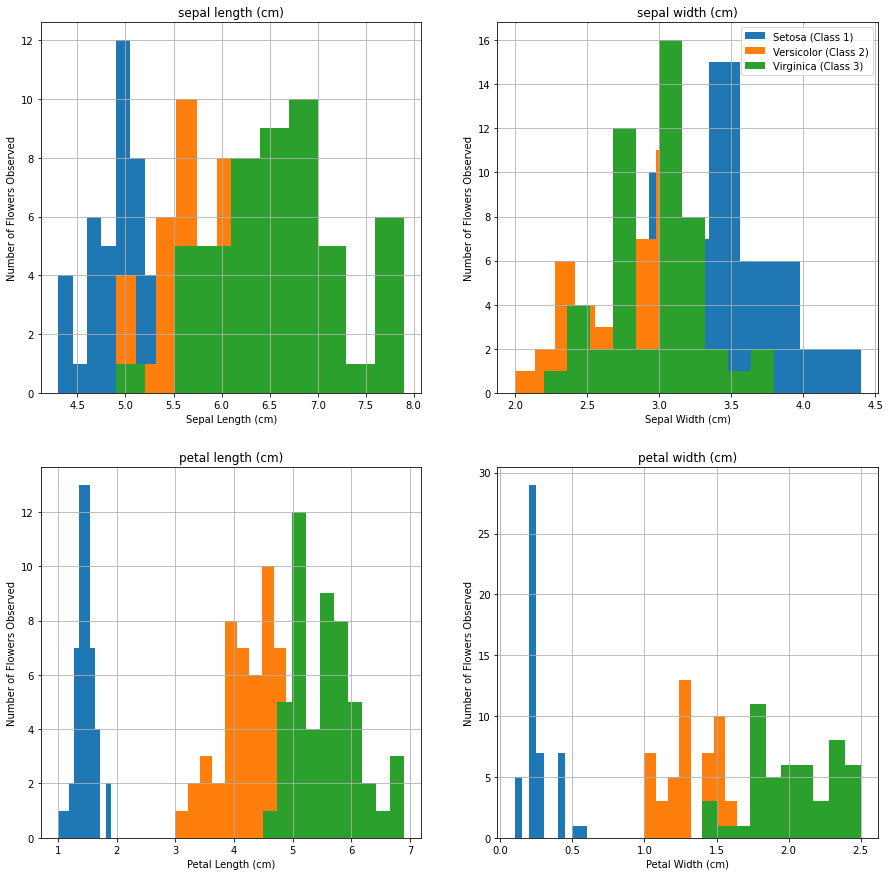

In [ ]:
import pandas as p
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(2,2)

axs[0][0].set_title(iris['feature_names'][0])
axs[0][0].set_xlabel("Sepal Length (cm)")
axs[0][0].set_ylabel("Number of Flowers Observed")

axs[0][1].set_title(iris['feature_names'][1])
axs[0][1].set_xlabel("Sepal Width (cm)")
axs[0][0].set_ylabel("Number of Flowers Observed")

axs[1][0].set_title(iris['feature_names'][2])
axs[1][0].set_xlabel("Petal Length (cm)")
axs[0][0].set_ylabel("Number of Flowers Observed")

axs[1][1].set_title(iris['feature_names'][3])
axs[1][1].set_xlabel("Petal Width (cm)")
axs[0][0].set_ylabel("Number of Flowers Observed")


sl[iris["target"] == 0].hist(ax=axs[0][0], figsize=(15,15), label="Setosa (Class 1)")
sl[iris["target"] == 1].hist(ax=axs[0][0], label="Versicolor (Class 2)")
sl[iris["target"] == 2].hist(ax=axs[0][0], label="Virginica (Class 3)")

sw[iris["target"] == 0].hist(ax=axs[0][1], label="Setosa (Class 1)")
sw[iris["target"] == 1].hist(ax=axs[0][1], label="Versicolor (Class 2)")
sw[iris["target"] == 2].hist(ax=axs[0][1], label="Virginica (Class 3)")

pl[iris["target"] == 0].hist(ax=axs[1][0], label="Setosa (Class 1)")
pl[iris["target"] == 1].hist(ax=axs[1][0], label="Versicolor (Class 2)")
pl[iris["target"] == 2].hist(ax=axs[1][0], label="Virginica (Class 3)")

pw[iris["target"] == 0].hist(ax=axs[1][1], label="Setosa (Class 1)")
pw[iris["target"] == 1].hist(ax=axs[1][1], label="Versicolor (Class 2)")
pw[iris["target"] == 2].hist(ax=axs[1][1], label="Virginica (Class 3)")

axs[0][1].legend()

**(a) Features that are likely to be useful for distinguishing the 3 classes**, 

-> Petal length and Petal Width are likely to be useful because they have less number of data points in the overlap area

**(b) Classes that are likely to overlap with each other to a great extent.**

-> Versicolor (Class 2) and Virginica (Class 3) seems to be to classes that overlap with each other to great extent, this can be corroborated by the plots especially tha last two plots where the overlap is distinctly visible. 

**(d)[5 points] Assume that each pattern can be represented by features x1 and x2. This means, each pattern can be viewed as a point in 2-dimensional space. Draw a scatter plot showing all 150 patterns (use different labels/markers to distinguish between classes). Draw another scatter plot based on features x3 and x4. Based on these scatter plots, explain which of the two feature subsets ({x1, x2} or {x3, x4}) is likely to be useful for separating the 3 classes.**

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Text(0, 0.5, 'Petal Width (cm)')

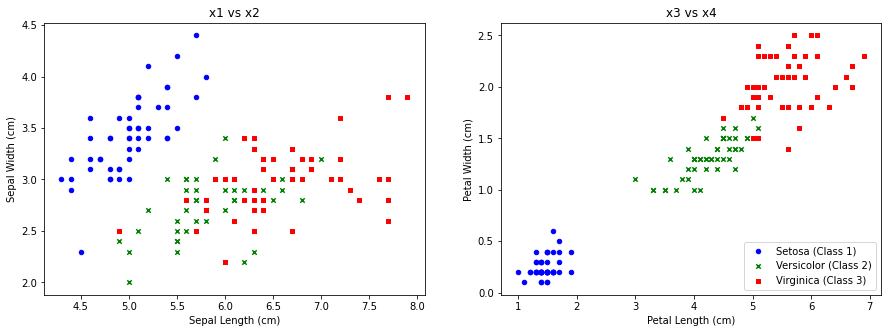

In [ ]:
fig, axs = plt.subplots(1,2)

x1x2 = df[["sepal length (cm)", "sepal width (cm)", "target"]]
x1x2[iris["target"] == 0].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c="blue", marker="o", ax=axs[0], figsize=(15,5))
x1x2[iris["target"] == 1].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c="green", marker="x", ax=axs[0], figsize=(15,5))
x1x2[iris["target"] == 2].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c="red", marker="s", ax=axs[0], figsize=(15,5))

x3x4 = df[["petal length (cm)", "petal width (cm)", "target"]]
x3x4[iris["target"] == 0].plot.scatter(x="petal length (cm)", y="petal width (cm)", c="blue", marker="o", ax=axs[1], figsize=(15,5), label="Setosa (Class 1)")
x3x4[iris["target"] == 1].plot.scatter(x="petal length (cm)", y="petal width (cm)", c="green", marker="x", ax=axs[1], figsize=(15,5), label="Versicolor (Class 2)")
x3x4[iris["target"] == 2].plot.scatter(x="petal length (cm)", y="petal width (cm)", c="red", marker="s", ax=axs[1], figsize=(15,5), label="Virginica (Class 3)")

axs[1].legend(loc=4)

axs[0].set_title("x1 vs x2")
axs[1].set_title("x3 vs x4")

axs[0].set_xlabel("Sepal Length (cm)")
axs[0].set_ylabel("Sepal Width (cm)")

axs[1].set_xlabel("Petal Length (cm)")
axs[1].set_ylabel("Petal Width (cm)")

**Explain which of the two feature subsets ({x1, x2} or {x3, x4}) is likely to be useful for separating the 3 classes.**

-> Petal Lenght vs Petal Width (x3 vs x4) looks like a more feasible option to separate the classes because of higher inter class distance as seen in the right side plot, this will help in estimating a better decision boundary.

**(e)[4points]Assume that each pattern can be represented by features{x1,x2,x4}.Draw a3-dimensional scatter plot showing all 150 patterns. Based on this scatter plot, explain which classes overlap with each other to a great extent. (You may have to rotate the plot to get a better view of the overlapping classes).**

In [ ]:
!pip install PyQt5 

Text(0.5, 0, 'Petal Width (cm)')

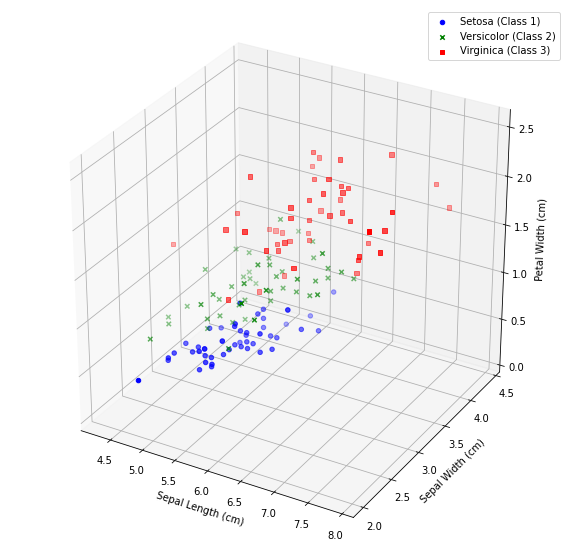

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x1x2x4 = df[["sepal length (cm)", "sepal width (cm)", "petal width (cm)", "target"]]
ax.scatter(x1x2x4[df["target"] == 0]["sepal length (cm)"], x1x2x4[df["target"] == 0]["sepal width (cm)"], x1x2x4[df["target"] == 0]["petal width (cm)"], c="blue", marker="o", label="Setosa (Class 1)")
ax.scatter(x1x2x4[df["target"] == 1]["sepal length (cm)"], x1x2x4[df["target"] == 1]["sepal width (cm)"], x1x2x4[df["target"] == 1]["petal width (cm)"], c="green", marker="x", label="Versicolor (Class 2)")
ax.scatter(x1x2x4[df["target"] == 2]["sepal length (cm)"], x1x2x4[df["target"] == 2]["sepal width (cm)"], x1x2x4[df["target"] == 2]["petal width (cm)"], c="red", marker="s", label="Virginica (Class 3)")

ax.legend()

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Width (cm)')

**Based on this scatter plot, explain which classes overlap with each other to a great extent.**

-> After rotating the scatter plot, setosa flowers (class 1) and versicolor (class 2) flowers overlap with each other to a great extent. Also, virginica flowers (class 3) are scattered a lot with Sepal width and Petal width and does not overlap with the two classes to that extent. However, the 2D plot concluded that class 2 and class3 overlap with each other.

**(f) [2 points] Given a set of 4-dimensional patterns belonging to two classes, describe a way to determine the extent of overlap (i.e., the degree of overlap) between the two classes?**

-> Degree of overlap can be estimated by finding difference of mean of two classes to see to what extent they overlap. Overlapping can be visualized as shdaed aread of intersection between two classes and their respective data points that outline a boundary indicating a class. 

# Q2


**[15 points] Describe each of the following terms with an example: (a) generalization, (b) intra-class variation, (c) decision boundary, (d) reinforcement learning, (e) invariant representation**

**(a) Generalization**

It usually refers to the model’s ability to adapt well to unseen data from a similar distribution to generate accurate predictions.
For example, if we choose a complex decision boundary to classify salmon and sea-bass, then it would be a perfect choice but only for those instances of the given dataset. If our complex decision boundary is presented with never seen before data (novel data), it would not be able to take actions that can classify those data points or fish not seen yet. 

**(b) Intra-class variation**

Intra-class variation talks about correlations amongst different samples of the same class. It highlights different features and their respective relations within multiple instances of the same class. 
For example, variations in length, weight, width of a sample (say, a fish) in the class of salmon

**(c) Decision boundary**

It is a surface (line in case of two dimensions) that separates the samples of one class from the other classes by forming regions in the given feature space. It can help in visualizing the classification of data points. 
For example, the decision boundary will act as a rule in classifying salmon and sea-bass if its feature vector (say, lightness) falls below the decision boundary. 

**(d) Reinforcement learning**

It is a type of learning category where the categories are not predefined and the model (agent) learns via feedback. It takes actions based on the feedback (rewards or punishments) from the environment.
For example, if a robot has to travel from point A to point B in a room with few obstacles, it will learn how to take the next step in a direction where it will not encounter any hindrance and resume its locomotion smoothly.

**(e) Invariant representation**

It refers to the representation of certain distinguishing features that might not hold any relevance to any kind of transformations applied to the input dataset and will not be an important input in our classification. 
For example, the size of the fish while we are classifying as salmon or sea bass will not be important for classification and thus, we would features that stand invariant to scale


# Q3


**[20 points] The paper Leafsnap: A Computer Vision System for Automatic Plant Species Identification by Kumar et al discusses a pattern classification system that determines plant species using automatic visual recognition.**

**(a) Briefly describe this system based on the pattern recognition terminology developed in class: (i) sensors used; (ii) segmentation method; (iii) features extracted; and (iv) classification model. How many features (i.e., d) and classes (i.e., c) are present?**

**(i) sensors**
Untrained users that tried to take photos of leaves with multiple leaves present amid clutter with severe lighting and blur artifacts.

**(ii) segmentation method**
Estimating foreground and background color distributions in the saturation-value space of the HSV colorspace and using these to independently classify each pixel. This initial segmentation, solved using Expectation-Maximization is then post-processed to remove false positive regions and the leaf stem. This color-based segmentation has several advantages compared to other approaches.

**(iii) features extracted**
Curvature features from the binarized image for representing the shape of the leaf to compute histograms of curvature over multiple scales using integral measures of curvature. 

**(iv) classification model**
Support Vector Machine (SVM) with an RBF kernel
How many features (i.e., d) and classes (i.e., c) are present?
525 features and 184 classes in the dataset

**(b) How was classifier training accomplished? How many patterns were available in the training set? How were the training patterns labeled?**

How was classifier training accomplished?

They implement the classifier using gist features computed on the image that are fed into a Support Vector Machine (SVM) with an RBF kernel as the classification function. To ensure that the gist values are scale-invariant, input images are resized. They used libsvm implementation of SVMs and the LEAR implementation of gist. and takes 1.4 seconds to run per image. 
How many patterns were available in the training set? 
The classifier is trained with 5,972 manually labeled data with 184 categories. It is extremely effective, with occasional false negatives addressed by the user simply taking another photo.

How were the training patterns labeled?

They were labeled by leaf’s contour over multiple scales, and identifying the species from a dataset of the 184 trees in the Northeastern United States


**(c) How was the performance of the pattern recognition system evaluated? What metrics were used to evaluate classifier performance?**

How was the performance of the pattern recognition system evaluated?

Comparing the features to those from a labeled database of leaf images and returning the species with the closest matches. They evaluate by performing leave-one image-out species identification.

What metrics were used to evaluate classifier performance?

As mentioned in the paper, Rank of the correct species.


**(d) In your opinion, did the proposed pattern recognition system perform well? Why or why not?**

Yes, I believe the proposed system performed well because their color-based segmentation outperforms other published segmentation methods, in large part because the constraints for this task – requiring the preservation of fine-scale features such as serrations and thin structures, as well as operating at interactive speeds – are more stringent than commonly assumed in the literature, yet frequent in many application domains. 
Also, it was interesting to see how curvature histograms are effective shape descriptors as they can be leveraged to robustly computed using integral measures to make for efficient and simple retrieval using nearest neighbors method. 


# Q4



**[15 points] What type of learning scheme - supervised, unsupervised, or reinforcement - can be used to
address each of the following problems. You must justify your answer.**

**(a)  Teaching a computer to play chess.**

Reinforcement Learning
Reason: We do not have a set of labeled classes but instead every pawn should learn in which direction it can move to maximize the chances of survival (objective function). It will take feedback from the environment and then take subsequent actions.
 						
				 							
**(b)  Given a set of sea-shells, group them into multiple categories.**

Unsupervised Learning
Reason: We are given a set of sea-shell, but we do not know the categories/classes and we have to use the knowledge of features to classify the shells into categories. 
 						
						 							
**(c)  Determining the make and model of a car based on its side-view image.**

Supervised Learning
Reason: We have our own feature set based on color, door design, wheels etc. to classify what kind of make and model the car would be. 

 								 							
**(d)  Predicting whether it would rain or not in the next 24 hours based on current weather conditions such as precipitation, humidity, temperature, wind, pressure, etc.**

Supervised Learning
Reason: We are already given a set of categories/classes to classify as rainy or non-rainy day  and we have the knowledge of features that can be used to classify the shells into categories like precipitation, humidity, temperature, wind, pressure

 								 							
**(e) Segmenting a digital image into multiple regions such that each region has a distinct color or texture.**

Unsupervised Learning
Reason: Here we will be forming natural clusters or segmenting the images into segments based on a given set of patterns, in this case distinct color or texture, however, we do not have predefined categories. 

# Q5
Consider the problem of classifying two-dimensional patterns of the form x = (x1, x2)t into one of two categories, ω1 or ω2. Using the labeled patterns presented in this data set1, do the following.

**(a) [8 points] Plot the histograms (bin size = 1) corresponding to (x1|ω1) and (x1|ω2) in a graph.2. Also, plot the histograms (bin size = 1) corresponding to (x2|ω1) and (x2|ω2) in a separate graph. Is x1 more discriminatory than x2?**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
columns = ["x1", "x2", "class"]
data = pd.read_table('/content/sample_data/patterns_labels.txt', sep=" ", header=None, names=columns)
data.head()
#data.groupby('class').hist()

,x1,x2,class
0,3.84,10.03,1
1,7.48,6.33,1
2,1.64,2.96,1
3,4.01,3.85,1
4,6.51,5.67,1


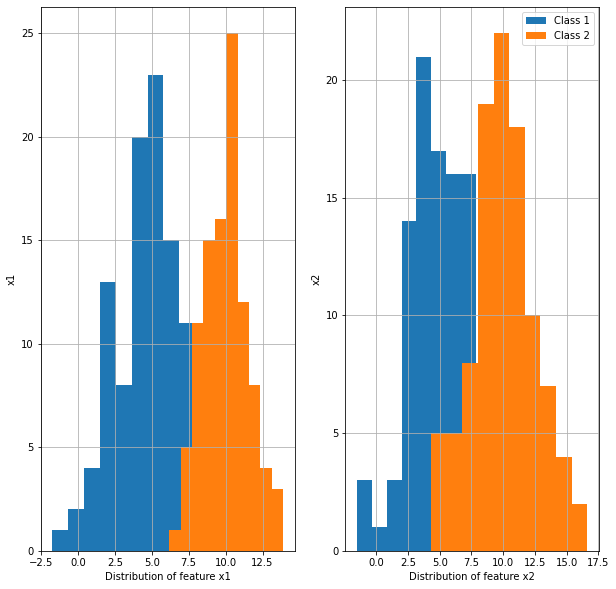

In [ ]:
import pandas as p
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

fig, axs = plt.subplots(1,2)

x1 = data["x1"]
x2 = data["x2"]

axs[0].set_xlabel("Distribution of feature x1")
axs[1].set_xlabel("Distribution of feature x2")

axs[0].set_ylabel("x1")
axs[1].set_ylabel("x2")

x1[data["class"] == 1].hist(ax=axs[0], figsize=(10,10))
x1[data["class"] == 2].hist(ax=axs[0])

x2[data["class"] == 1].hist(ax=axs[1], label="Class 1")
x2[data["class"] == 2].hist(ax=axs[1], label="Class 2")

axs[1].legend()

class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: x1, dtype: object

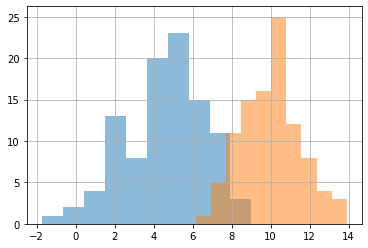

In [7]:
#using transparency alpha = 0.5 as per suggestion from Dr. Ross
data.groupby(['class'])['x1'].hist(edgecolor='None', alpha = 0.5)

class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: x2, dtype: object

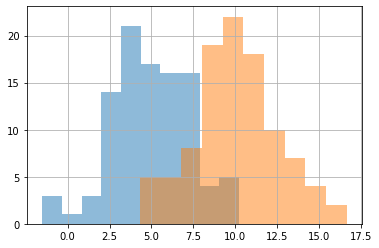

In [8]:
data.groupby(['class'])['x2'].hist(edgecolor='None', alpha = 0.5)

**Is x1 more discriminatory than x2?**

-> I believe that x1 is more discriminatory than x2 because while comparing their overlap areas, it will be a better distinguishing feature to classify classes 1 and 2.

**(b) [7 points] Plot the two-dimensional patterns in a graph. Use markers to distinguish the patterns according to their class labels. Suppose you have the following decision rule (classifier) to classify a novel pattern x = (x1, x2)t:
If x1 + x2 − 15 < 0, assign x → ω1, else assign x → ω2.
In the same graph, plot the decision boundary corresponding to this rule. What is the error rate
(i.e., the percentage of patterns that are misclassified) when this decision rule is used to classify the patterns in the given data set?**


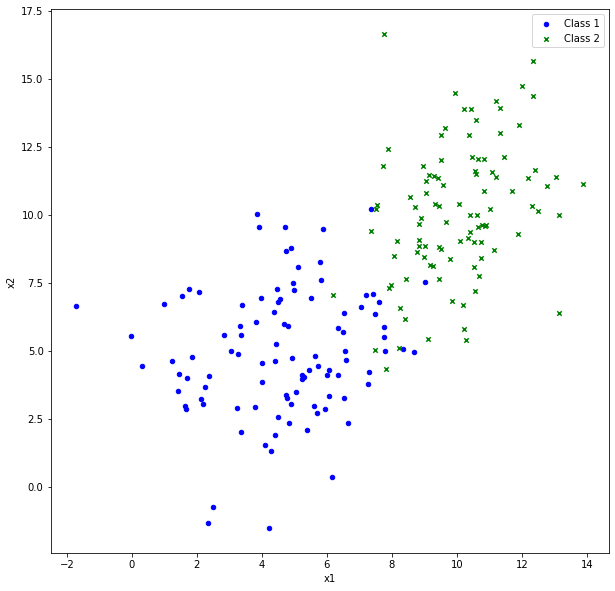

In [ ]:
fig, axs = plt.subplots(1,1)

x1x2 = data[["x1", "x2", "class"]]
x1x2[data["class"] == 1].plot.scatter(x="x1", y="x2", c="blue", marker="o", ax=axs, figsize=(10,10), label="Class 1")
x1x2[data["class"] == 2].plot.scatter(x="x1", y="x2", c="green", marker="x", ax=axs, figsize=(10,10), label="Class 2")
axs.legend()


**In the same graph, plot the decision boundary corresponding to this rule.**

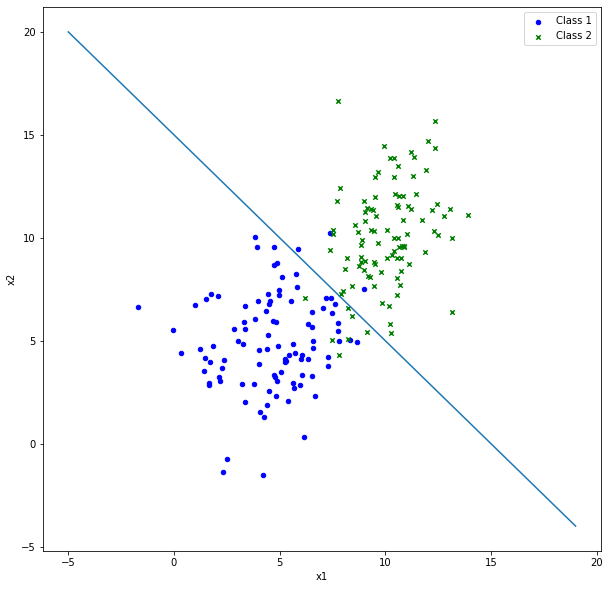

In [ ]:
fig, axs = plt.subplots(1,1)

x1x2 = data[["x1", "x2", "class"]]
x1x2[data["class"] == 1].plot.scatter(x="x1", y="x2", c="blue", marker="o", ax=axs, figsize=(10,10), label="Class 1")
x1x2[data["class"] == 2].plot.scatter(x="x1", y="x2", c="green", marker="x", ax=axs, figsize=(10,10), label="Class 2")
axs.legend()


x1 = range(-5, 20)
x2 = [15-x for x in x1]

plt.plot(x1, x2)

**What is the error rate
(i.e., the percentage of patterns that are misclassified) when this decision rule is used to classify the patterns in the given data set?**

In [ ]:
true_x1, false_x1 = 0, 0
true_x2, false_x2 = 0, 0

for i, row in data.iterrows():
    if row["x1"] + row["x2"] - 15 < 0:
        if row["class"] == 1:true_x1 += 1
        else:false_x1 += 1
    else:
        if row["class"] == 2:true_x2 += 1
        else:false_x2 += 1
            
total = true_x1 + false_x1 + true_x2 + false_x2
false = false_x1 + false_x2

print("Error Rate:", false/total)

Error Rate: 0.05


**(c) [7 points] Repeat the above after modifying the decision rule (classifier) as follows: If x1 + x2 − 12 < 0, assign x → ω1, else assign x → ω2.**

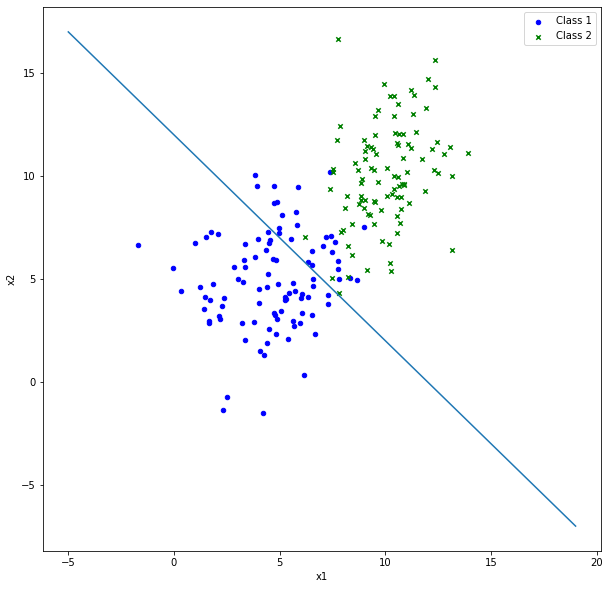

In [ ]:
fig, axs = plt.subplots(1,1)

x1x2 = data[["x1", "x2", "class"]]
x1x2[data["class"] == 1].plot.scatter(x="x1", y="x2", c="blue", marker="o", ax=axs, figsize=(10,10), label="Class 1")
x1x2[data["class"] == 2].plot.scatter(x="x1", y="x2", c="green", marker="x", ax=axs, figsize=(10,10), label="Class 2")
axs.legend()


x1 = range(-5, 20)
x2 = [12-x for x in x1]

plt.plot(x1, x2)

**Error Rate**

In [ ]:
true_x1, false_x1 = 0, 0
true_x2, false_x2 = 0, 0

for i, row in data.iterrows():
    if row["x1"] + row["x2"] - 12 < 0:
        if row["class"] == 1:true_x1 += 1
        else:false_x1 += 1
    else:
        if row["class"] == 2:true_x2 += 1
        else:false_x2 += 1
            
total = true_x1 + false_x1 + true_x2 + false_x2
false = false_x1 + false_x2

print("Error Rate:", false/total)

Error Rate: 0.135


**(d)[3 points] Which of the two classifiers has performed well on this dataset? (Note: These classifiers were arbitrarily derived. As we will see later in the course, there is a principled way for obtaining decision boundaries from training data).**

-> First classifer with error rate 0.05 did a better job at classifiying the two classes as compared to the later with the error rate 0.135. We can also see this from the plot with their respective decision boundaries.

In [11]:
!pip install -U notebook-as-pdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 8.3 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [12]:
!pyppeteer-install

[INFO] Starting Chromium download.
100% 109M/109M [00:04<00:00, 25.4Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/588429


In [13]:
!jupyter-nbconvert --to PDFviaHTML CSE802-HW1-RiyaThakore.ipynb

[NbConvertApp] WARNING | pattern 'CSE802-HW1-RiyaThakore.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--